# Goal & Steps:

1. Predicting Car Prices:
   - Task: Build a regression model to predict the price of cars based on other features in the dataset. This could involve preprocessing the data, selecting relevant features, and implementing regression algorithms.

2. Feature Engineering:
   - Task: Challenge students to come up with creative ways to engineer new features from the existing ones. For example, they could create a new feature representing the ratio of horsepower to curb weight.

3. Exploratory Data Analysis (EDA):
   - Task: Have students perform in-depth exploratory data analysis to understand the relationships between different features. Visualization tools can be used to communicate their findings effectively.

4. Handling Missing Data:
   - Task: Teach students how to handle missing data in a dataset. They can explore different strategies such as imputation or removal of missing values.

5. Training:
   - Task: Use relavant ML Models

6. Model evaluation:
- Evaluate models and Summarizing their findings. This should include a clear explanation of the model's performance and any insights gained from the analysis.

### 1. Dataset Import

In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/automobile.csv'
df = pd.read_csv(url)

### 2. EDA (Exploratory Data Analysis)

#### 2.1 Basic Information

In [12]:
df.tail(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
192,-2,103.0,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985
193,-1,74.0,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515
194,-2,103.0,volvo,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420
195,-1,74.0,volvo,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
200,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          202 non-null    int64  
 1   normalized-losses  165 non-null    float64
 2   make               202 non-null    object 
 3   fuel-type          202 non-null    object 
 4   aspiration         202 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         202 non-null    object 
 7   drive-wheels       202 non-null    object 
 8   engine-location    202 non-null    object 
 9   wheel-base         202 non-null    float64
 10  length             202 non-null    float64
 11  width              202 non-null    float64
 12  height             202 non-null    float64
 13  curb-weight        202 non-null    int64  
 14  engine-type        202 non-null    object 
 15  num-of-cylinders   202 non-null    object 
 16  engine-size        202 non

In [15]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,202.000000,165.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,0.831683,121.836364,98.848020,174.273267,65.903960,53.775248,2558.173267,126.945545,10.160990,25.148515,30.658416,13253.752475
std,1.258360,35.396412,6.094523,12.334330,2.106915,2.444769,517.236654,41.455269,3.995264,6.421956,6.809940,7954.919591
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.800000,64.125000,52.000000,2174.250000,98.000000,8.600000,19.000000,25.000000,7778.250000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2417.000000,120.000000,9.000000,24.000000,30.000000,10320.000000
75%,2.000000,150.000000,102.400000,183.500000,66.825000,55.500000,2932.750000,141.000000,9.400000,30.000000,34.000000,16502.250000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [4]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

#### 2.2 Missing Values Analysis

In [16]:
df.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

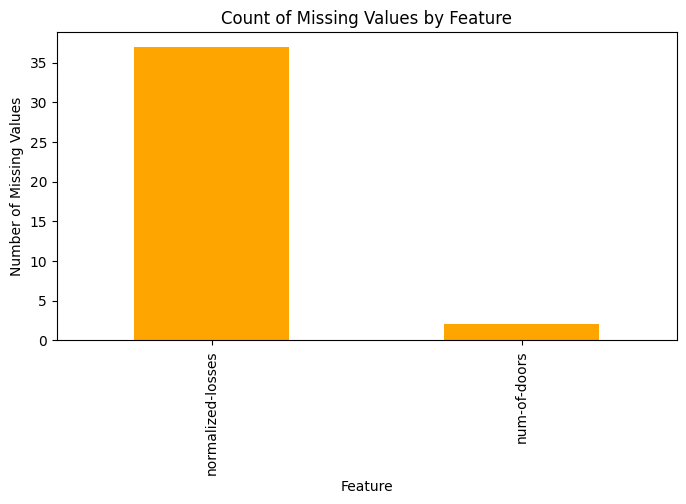

In [25]:
plt.figure(figsize=(8, 4))
missing_counts.plot(kind='bar', color='orange')
plt.title('Count of Missing Values by Feature')
plt.xlabel('Feature')
plt.ylabel('Number of Missing Values')
plt.show()

Skewness of 'normalized-losses': 0.7755044916598286


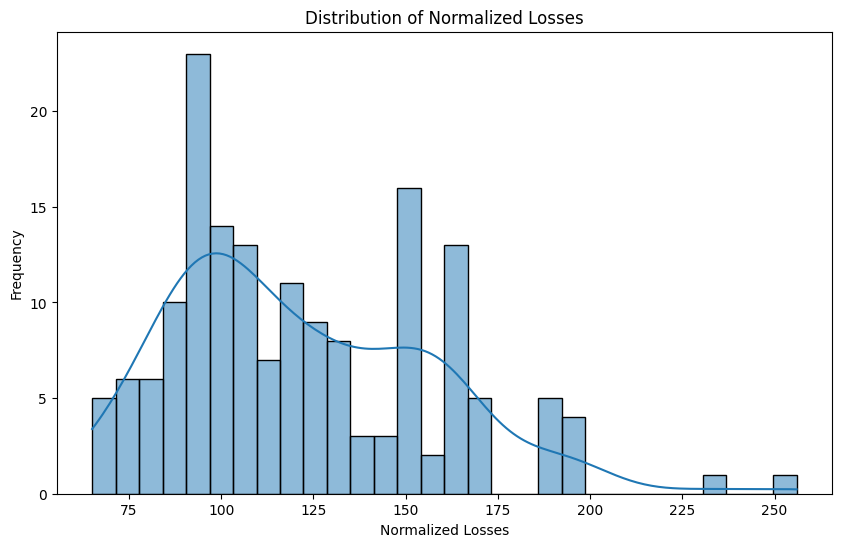

In [27]:
# Calculate skewness of 'normalized-losses'
skewness = df['normalized-losses'].skew()
print(f"Skewness of 'normalized-losses': {skewness}")

plt.figure(figsize=(10, 6))
sns.histplot(df['normalized-losses'].dropna(), kde=True, bins=30)
plt.title('Distribution of Normalized Losses')
plt.xlabel('Normalized Losses')
plt.ylabel('Frequency')
plt.show()

***Imputation Decision***
- Since the skewness is greater than 0.5, it suggests that the distribution is moderately skewed.
- Median imputation is recommended because it is more robust to skewness and minimizes the impact of outliers.

In [30]:
from sklearn.impute import SimpleImputer

# Apply median imputation to 'normalized-losses'
median_imputer = SimpleImputer(strategy='median')
df['normalized-losses'] = median_imputer.fit_transform(df[['normalized-losses']])

In [32]:
# Apply mode imputation to 'num-of-doors'
mode_imputer = SimpleImputer(strategy='most_frequent')
df['num-of-doors'] = mode_imputer.fit_transform(df[['num-of-doors']]).ravel()

In [33]:
# Check for any remaining missing values in the entire dataset
print("\nRemaining missing values in the dataset:")
print(df.isnull().sum())


Remaining missing values in the dataset:
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


#### 2.3 Distribution Analysis

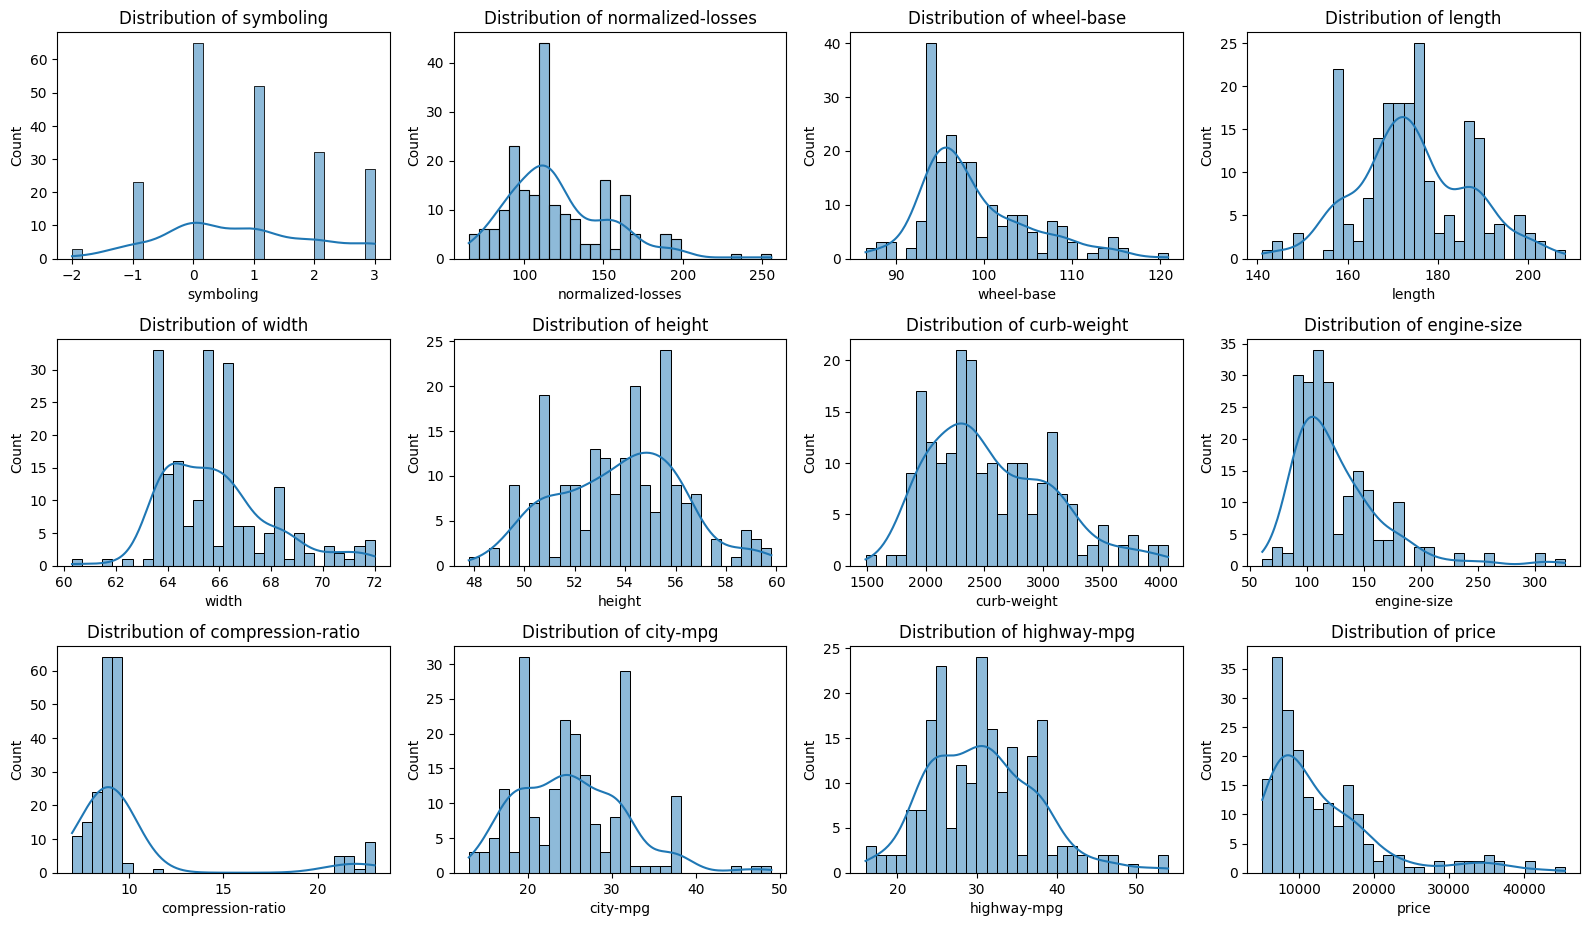

In [34]:
# Select numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot distribution of numerical features
plt.figure(figsize=(16, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

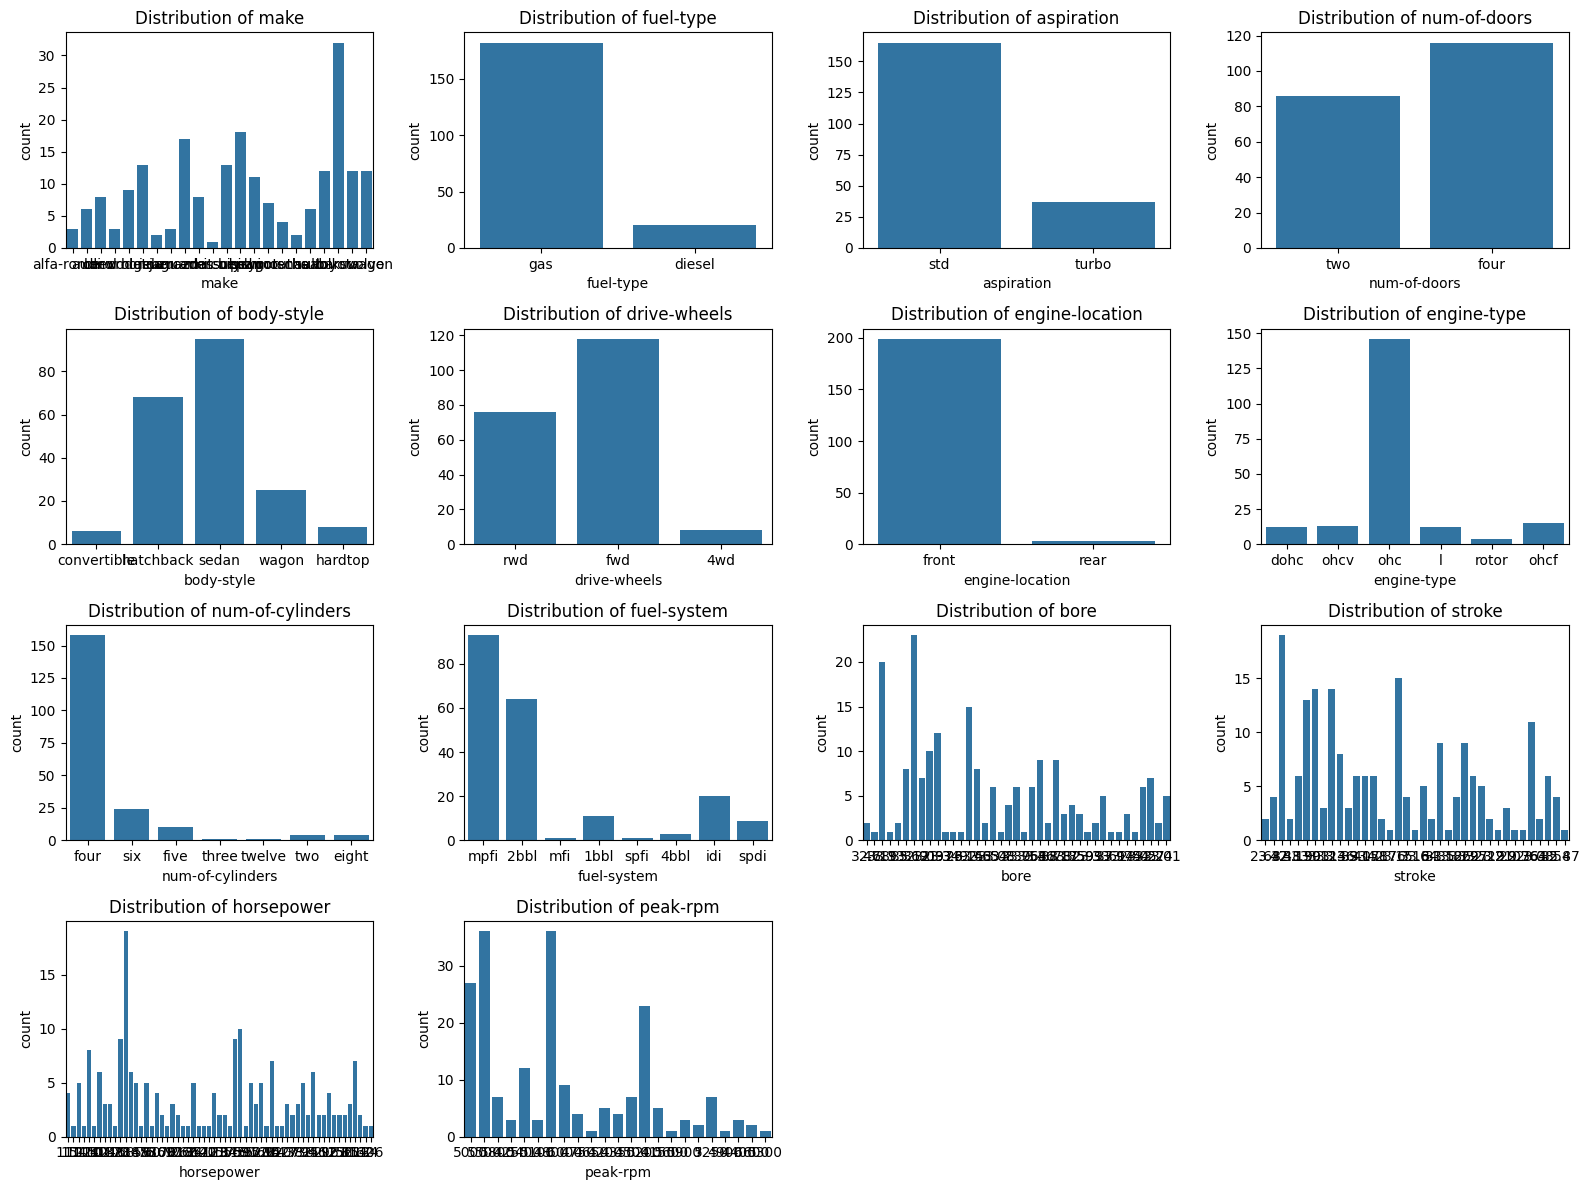

In [44]:
# Select categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# Plot distribution of categorical features
plt.figure(figsize=(16, 12))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(4, 4, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

### 3. Feature Engineering

#### 3.1 Encoding Categorical Variables

In [46]:
# Select categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Display the first few rows of the encoded dataframe
print(df_encoded.head())

   symboling  normalized-losses  wheel-base  length  width  height  \
0          3              115.0        88.6   168.8   64.1    48.8   
1          3              115.0        88.6   168.8   64.1    48.8   
2          1              115.0        94.5   171.2   65.5    52.4   
3          2              164.0        99.8   176.6   66.2    54.3   
4          2              164.0        99.4   176.6   66.4    54.3   

   curb-weight  engine-size  compression-ratio  city-mpg  ...  peak-rpm_5250  \
0         2548          130                9.0        21  ...          False   
1         2548          130                9.0        21  ...          False   
2         2823          152                9.0        19  ...          False   
3         2337          109               10.0        24  ...          False   
4         2824          136                8.0        18  ...          False   

   peak-rpm_5300  peak-rpm_5400  peak-rpm_5500  peak-rpm_5600  peak-rpm_5800  \
0          False  

#### 3.2 Handling Skewed Features

In [48]:
import numpy as np
# Identify skewed features (for demonstration)
skewed_feats = df_encoded[num_cols].apply(lambda x: x.skew()).sort_values(ascending=False)
print("Skewed Features:")
print(skewed_feats[abs(skewed_feats) > 0.5])  # Adjust threshold as needed

# Apply log transformation to positively skewed features
for col in skewed_feats[skewed_feats > 0.5].index:
    df_encoded[col] = np.log1p(df_encoded[col])  # log1p is log(1+x) to avoid log(0)

# Check skewness again after transformation
print("Skewness After Transformation:")
print(df_encoded[num_cols].apply(lambda x: x.skew()).sort_values(ascending=False))

Skewed Features:
compression-ratio    2.592726
engine-size          1.977365
price                1.785834
wheel-base           1.010842
normalized-losses    0.964381
width                0.857130
curb-weight          0.692532
city-mpg             0.687371
highway-mpg          0.557602
dtype: float64
Skewness After Transformation:
compression-ratio    2.375371
engine-size          0.867032
wheel-base           0.849975
width                0.769915
price                0.663321
curb-weight          0.273214
symboling            0.200931
normalized-losses    0.182498
length               0.143794
city-mpg             0.027554
height               0.020291
highway-mpg         -0.100800
dtype: float64


In [50]:
# List of features to transform
features_to_transform = ['compression-ratio', 'engine-size', 'price', 'wheel-base', 'normalized-losses', 'width']

# Apply log transformation to each feature in the list
for col in features_to_transform:
    if df_encoded[col].skew() > 0.5:  # Check if skewness is still high
        df_encoded[col] = np.log1p(df_encoded[col])  # log(1+x)

# Check skewness again after transformations
print("Skewness After Further Transformations:")
print(df_encoded[features_to_transform].apply(lambda x: x.skew()).sort_values(ascending=False))

Skewness After Further Transformations:
compression-ratio    2.232900
wheel-base           0.821346
width                0.753077
engine-size          0.706290
price                0.569134
normalized-losses    0.182498
dtype: float64


#### 3.3 Scaling Numerical Features

In [51]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns after transformations
num_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical features
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# Display the first few rows of the scaled dataframe
print(df_encoded.head())

   symboling  normalized-losses  wheel-base    length     width    height  \
0   1.727411          -0.056964   -1.814736 -0.444845 -0.866254 -2.040114   
1   1.727411          -0.056964   -1.814736 -0.444845 -0.866254 -2.040114   
2   0.134091          -0.056964   -0.720775 -0.249783 -0.177009 -0.563924   
3   0.930751           1.333702    0.196007  0.189107  0.161156  0.215176   
4   0.930751           1.333702    0.128818  0.189107  0.257003  0.215176   

   curb-weight  engine-size  compression-ratio  city-mpg  ...  peak-rpm_5250  \
0     0.079106     0.262584          -0.237666 -0.593191  ...          False   
1     0.079106     0.262584          -0.237666 -0.593191  ...          False   
2     0.602386     0.816086          -0.237666 -0.987229  ...          False   
3    -0.362209    -0.378130           0.173472 -0.064692  ...          False   
4     0.604194     0.423744          -0.712748 -1.199290  ...          False   

   peak-rpm_5300  peak-rpm_5400  peak-rpm_5500  peak-rpm

#### 3.4 Splitting the Dataset

In [52]:
# Define features (X) and target variable (y)
X = df_encoded.drop('price', axis=1)  # Features
y = df_encoded['price']  # Target variable

# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Perform the train-test split (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (141, 214)
X_test shape: (61, 214)
y_train shape: (141,)
y_test shape: (61,)


### 4. Model Building

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "KNN": KNeighborsRegressor(),
    "Support Vector Regression": SVR()
}

# Dictionary to hold performance metrics
results = {}

# Train each model and evaluate performance
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results[name] = {
        "Mean Absolute Error (MAE)": mae,
        "Mean Squared Error (MSE)": mse,
        "R-squared": r2
    }

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                           Mean Absolute Error (MAE)  \
Linear Regression                       9.140304e+11   
Decision Tree                           2.428909e-01   
Random Forest                           2.350784e-01   
KNN                                     3.098666e-01   
Support Vector Regression               2.364242e-01   

                           Mean Squared Error (MSE)     R-squared  
Linear Regression                      4.769564e+24 -3.831673e+24  
Decision Tree                          1.079757e-01  9.132567e-01  
Random Forest                          8.427015e-02  9.323008e-01  
KNN                                    1.801531e-01  8.552723e-01  
Support Vector Regression              8.139032e-02  9.346143e-01  


In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Random Forest model with default parameters
rf_model = RandomForestRegressor(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print(f"Random Forest Model Performance (Default Parameters):")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Random Forest Model Performance (Default Parameters):
Mean Absolute Error (MAE): 0.23
Mean Squared Error (MSE): 0.08
R-squared: 0.93


In [56]:
# Get feature importances from the Random Forest model
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame(importances, index=X.columns, columns=["Importance"]).sort_values("Importance", ascending=False)

# Display the feature importances
print("\nFeature Importance:")
print(feature_importance_df)


Feature Importance:
               Importance
curb-weight      0.703452
engine-size      0.133941
highway-mpg      0.049800
city-mpg         0.018754
width            0.015186
...                   ...
horsepower_?     0.000000
peak-rpm_5300    0.000000
peak-rpm_5600    0.000000
peak-rpm_5900    0.000000
peak-rpm_?       0.000000

[214 rows x 1 columns]
